# Content:
1. [Lagrange interpolating polynomial](#1.-Lagrange-interpolating-polynomial)
2. [Runge's curse and overfitting](#2.-Runge's-curse-and-overfitting)
3. [Least squares fitted polynomial vs. interplating polynomial](#3.-Least-squares-fitted-polynomial-vs.-interplating-polynomial)

## 1. Lagrange interpolating polynomial 

![board%20work%20-28.jpg](boardwork/board%20work%20-28.jpg)
![board%20work%20-29.jpg](boardwork/board%20work%20-29.jpg)

Let's code it up!

In [1]:
import numpy as np
def L_Dk(k,x_data,x):
    D=len(x_data)
    val=1.0
    for i in range(0,D):
        if i != k:
            val=val*(x-x_data[i])/(x_data[k]-x_data[i])  #NOTE: product
    return(val)
    
def Lagrange_poly(x_data,y_data,x):
    D=len(x_data)
    val=0
    for k in range(0,D):
        val=val+y_data[k]*L_Dk(k,x_data,x) #NOTE: sum
    return(val)

#=== Let's try a simple example of a line passing through (0,0) and (1,1)
x_data=np.array([0,1])
y_data=np.array([0,1])

#=== make 'x' continuous using grids
x_i=-2.0
x_f=2.0
dx=0.5
x=np.arange(x_i, x_f+dx, dx, float)

N_grids=len(x)

for i_grids in range(N_grids):
    print(x[i_grids],Lagrange_poly(x_data,y_data,x[i_grids]))

-2.0 -2.0
-1.5 -1.5
-1.0 -1.0
-0.5 -0.5
0.0 0.0
0.5 0.5
1.0 1.0
1.5 1.5
2.0 2.0


## 2. Runge's curse and overfitting

[Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) corresponds to the oscillation of a polynomials of high degree obtained using polynomial interpolation. The data used in the previous lecture 'data/fit_01.csv' shows how this works!

In [2]:
import numpy as np

#=== Read the data from a file
myfile=open('data/fit_01.csv','r')

x_data=np.array([])
y_data=np.array([])

iline=0
for line in myfile:
    if iline > 0:            # i == 0 corresponds to the heading
        string=line.split(',')  # csv, comma separated values
        valx=eval(string[0])
        valy=eval(string[1])
        x_data=np.append(x_data,[valx])
        y_data=np.append(y_data,[valy])
        
    iline=iline+1
myfile.close() 

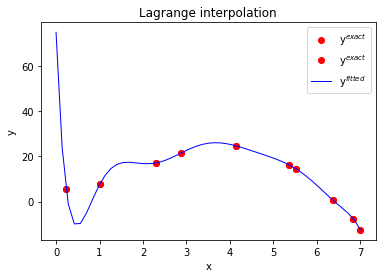

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

x_min=0.0
x_max=7.0
N_grids=51

xgrids=np.linspace(x_min, x_max, N_grids)

ygrids=np.zeros(N_grids)

for i_grids in range(N_grids):
    ygrids[i_grids]=Lagrange_poly(x_data,y_data,xgrids[i_grids])
    #print(xgrids[i_grids],ygridsfit[i_grids])

plt.plot(xgrids,ygrids,'-',color='b',linewidth=1,label='y$^{fitted}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Lagrange interpolation')

#plt.savefig('poly_interpolation.png')  

#=== display
plt.show()

Note that the polynomial seems to be smooth in the region [2,7] but for $x<2$ it oscillates. We say that the polynomial is [overfitted](https://en.wikipedia.org/wiki/Overfitting) in the region [2,7], hence on the left side the interpolated function's behavious is unpreditable.

## 3. Least squares fitted polynomial vs. interplating polynomial 

![board%20work%20-30.jpg](boardwork/board%20work%20-30.jpg)

In [12]:
x_data=np.array([-3,-1,3])
y_data=np.array([3,1,2])

In [13]:
def polyfit(x,y,D):
    '''
        Fits a given set of data x,y to a polynomial of degree D
    '''
    import numpy as np 
    
    #N=x.shape()
    
    X=np.vander(x, D+1, increasing=True)
    XT=np.transpose(X)
    
    A=np.matmul(XT,X)
    Ainv=np.linalg.inv(A)
    
    b=np.matmul(XT,y)
    
    a=np.matmul(Ainv,b)
    
    return(a)

def polyval(a,x):
    '''
        Determines the value of the polynomial using x and the coefficient vector a
    '''
    import numpy as np
    D=a.shape[0]
    N=x.shape

    y=np.zeros(N)
    for i in range(D):
        y=y+a[i]*x**i
    
    return(y)

In [14]:
D=2
a=polyfit(x_data,y_data,D)
for i in range(D+1):
    print(i,a[i])

0 0.625
1 -0.166666666667
2 0.208333333333


[-3 -1  3]


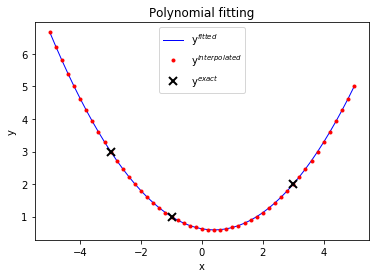

In [38]:
import numpy as np
import matplotlib.pyplot as plt


x_min=-5.0
x_max=5.0
N_grids=51
xgrids=np.linspace(x_min, x_max, N_grids)
ygridsfit=polyval(a,xgrids)

ygridsinter=np.zeros(N_grids)

print(x_data)
for i_grids in range(N_grids):
    ygridsinter[i_grids]=Lagrange_poly(x_data,y_data,xgrids[i_grids])
    
plt.plot(xgrids,ygridsfit,'-',color='b',linewidth=1,label='y$^{fitted}$')
plt.plot(xgrids,ygridsinter,'.',color='r',linewidth=1,label='y$^{interpolated}$')
plt.plot(x_data,y_data,marker='x',color='k',MarkerSize=8,markeredgewidth=2,linewidth=0,label='y$^{exact}$')



plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Polynomial fitting')

#plt.savefig('test.png')  

#=== display
plt.show()

---
Homework-13: Find the equation of a generalized parabola (or a generalized quadratic function) $f(x)=a_0+a_1 x+a_2 x^2$ passing through the points (-3,3), (-1,1), and (3,2). Hint: model the function as a Lagrange interpolating polynomial.

---

The above problem clearly illustrates the advantage of interpolating! We can do with matrix inversions and Gaussian elimination. However, when the degree of the interpolating polynomial increases, one must be wary of Runge's phenomenon.